## 1. Read Data


In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1,as_frame= False)

#### Structure of the data

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist["data"]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
mnist["target"]

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
mnist.data.shape

(70000, 784)

In [6]:
mnist.target.shape

(70000,)

In [7]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

## 2. Data Preprocessing

In [8]:
X, y = mnist["data"], mnist["target"]

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [11]:
X[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Visualizando

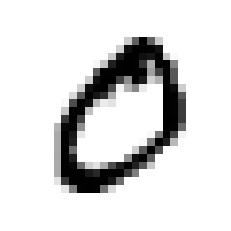

In [12]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

un_numero = X[1]
any_digit_image = un_numero.reshape(28,28)
plt.imshow(any_digit_image,cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

El target dice:

In [13]:
y[1]

'0'

Training y test set:

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

In [52]:
#Aqui haremos las variables especialmente para el modelo CNN, ya que se necesita estar en 3 dimensiones, 28 x 28 x 1
X_trainCNN = X_train.reshape(60000,28,28,1)
X_testCNN = X_test.reshape(10000,28,28,1)

In [16]:
y_test.shape

(10000,)

In [17]:
y_train.shape

(60000,)

## 3. Model Creation

Model #1 Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=50.0 / y_train.shape[0], penalty="l1", solver="saga", tol=0.1)

Model #2 Support Vector Machine (SVM)

In [19]:
from sklearn import svm
SVM = svm.SVC()

Model #3 Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10)

Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [21]:
from sklearn.neural_network import MLPClassifier
#MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000, tol=0.1)
MLP = MLPClassifier()

Model #5 Convolutional Neural Network (CNN)

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras 
from keras.models import Sequential
from keras.layers import  Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

#convert classes to one hot vectors
y_trainCNN = keras.utils.to_categorical(y_train)
y_testCNN = keras.utils.to_categorical(y_test)

CNN = Sequential()

CNN.add(Conv2D(64, kernel_size=3, input_shape=(28,28,1), activation='relu'))
CNN.add(Conv2D(32, kernel_size=3, activation='relu'))

CNN.add(Flatten())
CNN.add(Dense(10, activation='softmax'))

CNN.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [23]:
X_testCNN[1].shape

(28, 28, 1)

## 4. Training: Adjust Model with Historic Data

Model #1 Logistic Regression

In [24]:
LR.fit(X_train, y_train)

LogisticRegression(C=0.0008333333333333334, penalty='l1', solver='saga',
                   tol=0.1)

Model #2 Support Vector Machine (SVM)

In [25]:
SVM.fit(X_train, y_train)

SVC()

Model #3 Random Forest

In [26]:
RFC = RFC.fit(X_train, y_train)

Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [27]:
MLP.fit(X_train, y_train)

MLPClassifier()

Model #5 Convolutional Neural Network (CNN)

In [28]:
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

mc = ModelCheckpoint("./bestmodel.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

cb = [es, mc]

#his = CNN.fit(X_trainCNN, y_trainCNN, epochs=5, validation_split=0.3, callbacks=cb)

In [30]:
CNN.fit(X_trainCNN, y_trainCNN, validation_data=(X_testCNN, y_testCNN),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1130 - accuracy: 0.9670 - val_loss: 0.0789 - val_accuracy: 0.9745
Epoch 2/5
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0594 - accuracy: 0.9812 - val_loss: 0.0690 - val_accuracy: 0.9787
Epoch 3/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.0683 - val_accuracy: 0.9786
Epoch 4/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0306 - accuracy: 0.9902 - val_loss: 0.0933 - val_accuracy: 0.9769
Epoch 5/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0261 - accuracy: 0.9920 - val_loss: 0.0847 - val_accuracy: 0.9789


## 5. Prediction for New Data

Model #1 Logistic Regression

In [31]:
y_predictLR = LR.predict(X_test)

In [32]:
y_test[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype=object)

In [33]:
y_predictLR[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype=object)

Model #2 Support Vector Machine (SVM)

In [34]:
y_predictSVM = SVM.predict(X_test)

In [35]:
y_test[:15]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9',
       '0', '1'], dtype=object)

In [36]:
y_predictSVM[:15]

array(['7', '2', '1', '0', '4', '1', '4', '9', '6', '9', '0', '6', '9',
       '0', '1'], dtype=object)

Model #3 Random Forest

In [37]:
y_predictRFC = RFC.predict(X_test)

In [38]:
y_test[:15]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9',
       '0', '1'], dtype=object)

In [39]:
y_predictRFC[:15]

array(['7', '2', '1', '0', '4', '1', '4', '9', '4', '9', '0', '6', '9',
       '0', '1'], dtype=object)

Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [40]:
y_predictMLP = MLP.predict(X_test)

In [41]:
y_test[:20]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9',
       '0', '1', '5', '9', '7', '3', '4'], dtype=object)

In [42]:
y_predictMLP[:20]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9',
       '0', '1', '5', '9', '7', '3', '4'], dtype='<U1')

Model #5 Convolutional Neural Network (CNN)

In [82]:
y_predictCNN = CNN.predict_classes(X_testCNN)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [83]:
y_test[:20]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9',
       '0', '1', '5', '9', '7', '3', '4'], dtype=object)

In [84]:
y_predictCNN[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=int64)

# 6. Visualization of Results

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

Model #1 Logistic Regression

In [60]:
cross_val_score(LR, X_train, y_train, cv=3, scoring = "accuracy")

array([0.9166 , 0.91245, 0.9168 ])

In [61]:
accuracy_score(y_test,y_predictLR)

0.9238

Model #2 Support Vector Machine (SVM)

In [62]:
cross_val_score(SVM, X_train, y_train, cv=3, scoring = "accuracy")

array([0.977 , 0.9738, 0.9739])

In [63]:
accuracy_score(y_test,y_predictSVM)

0.9792

Model #3 Random Forest

In [64]:
cross_val_score(RFC, X_train, y_train, cv=3, scoring = "accuracy")

array([0.93895, 0.93965, 0.94005])

In [65]:
accuracy_score(y_test,y_predictRFC)

0.9459

Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [66]:
cross_val_score(MLP, X_train, y_train, cv=3, scoring = "accuracy")

array([0.9621 , 0.96035, 0.96135])

In [67]:
accuracy_score(y_test,y_predictMLP)

0.9626

Model #5 Convolutional Neural Network (CNN)

In [76]:
CNN.evaluate(X_testCNN, y_testCNN, verbose = 0)

[0.08471132814884186, 0.9789000153541565]